## Sentiment Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import random
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from collections import Counter
from textblob import TextBlob
from sklearn.decomposition import NMF

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle

import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#keras
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences

from keras.models import Sequential
from keras.layers import (LSTM,
                         Embedding,
                         BatchNormalization,
                         Dense,
                         TimeDistributed,
                         Dropout,
                         Bidirectional,
                         Flatten,
                         GlobalMaxPool1D)
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [2]:
# reading the dataset
data = pd.read_csv('/kaggle/input/consumer-reviews-of-amazon-products/1429_1.csv', low_memory = False)
data.head()

id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
2  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
3  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
4  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date     reviews.dateAdded  \
0  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
1  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
2  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
3  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
4  2017-01-12T00:00:00.000Z  2017-07-03T23:33:15Z   

                                    reviews.dateSeen reviews.didPurchase  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 NaN   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 NaN   
2  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 NaN   
3  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 NaN   
4  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z                 NaN   

  reviews.doRecommend  reviews.id  reviews.numHelpful  reviews.rating  \
0                True         NaN                 0.0             5.0   
1                True         NaN                 0.0             5.0   
2                True         NaN                 0.0             5.0   
3                True         NaN                 0.0             4.0   
4                True         NaN                 0.0             5.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5620406/review...   
1  http://reviews.bestbuy.com/3545/5620406/review...   
2  http://reviews.bestbuy.com/3545/5620406/review...   
3  http://reviews.bestbuy.com/3545/5620406/review...   
4  http://reviews.bestbuy.com/3545/5620406/review...   

                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                             reviews.title  reviews.userCity  \
0                                   Kindle               NaN   
1                                very fast               NaN   
2  Beginner tablet for our 9 year old son.               NaN   
3                                  Good!!!               NaN   
4                Fantastic Tablet for kids               NaN   

   reviews.userProvince reviews.username  
0                   NaN          Adapter  
1                   NaN           truman  
2                   NaN            DaveZ  
3                   NaN           Shacks  
4                   NaN        explore42

In [3]:
# selecting the reviews rating and text
data1 = data[['reviews.rating', 'reviews.text']]
data1.head()

reviews.rating                                       reviews.text
0             5.0  This product so far has not disappointed. My c...
1             5.0  great for beginner or experienced person. Boug...
2             5.0  Inexpensive tablet for him to use and learn on...
3             4.0  I've had my Fire HD 8 two weeks now and I love...
4             5.0  I bought this for my grand daughter when she c...

In [4]:
# data info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34627 non-null  float64
 1   reviews.text    34659 non-null  object 
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


In [5]:
# data shape
data1.shape

(34660, 2)

In [6]:
# review rating value counts
data1['reviews.rating'].value_counts().sort_values()

2.0      402
1.0      410
3.0     1499
4.0     8541
5.0    23775
Name: reviews.rating, dtype: int64

In [7]:
# reading dataset and selecting the reviews rating and text for review greater than or equal to 3
data2 = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data2 = data2[['reviews.rating' , 'reviews.text']]
data2 = data2[data2["reviews.rating"]<=3]

In [8]:
# data2 reviews rating value count
data2['reviews.rating'].value_counts()

3    1206
1     965
2     616
Name: reviews.rating, dtype: int64

In [9]:
# reading dataset and selecting the reviews rating and text for review greater than or equal to 3
data3 = pd.read_csv("/kaggle/input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
data3 = data3[['reviews.rating' , 'reviews.text']]
data3 = data3[data3["reviews.rating"]<=3]

In [10]:
# data3 reviews rating value count
data3['reviews.rating'].value_counts()

3    197
1     63
2     54
Name: reviews.rating, dtype: int64

In [11]:
# concatenating data1, data2 and data3
data = pd.concat([data1, data2, data3])

In [12]:
# displaying the top 5 and bottom 5data rows
data.head()

reviews.rating                                       reviews.text
0             5.0  This product so far has not disappointed. My c...
1             5.0  great for beginner or experienced person. Boug...
2             5.0  Inexpensive tablet for him to use and learn on...
3             4.0  I've had my Fire HD 8 two weeks now and I love...
4             5.0  I bought this for my grand daughter when she c...

In [13]:
# checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37761 entries, 0 to 4975
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  37728 non-null  float64
 1   reviews.text    37760 non-null  object 
dtypes: float64(1), object(1)
memory usage: 885.0+ KB


In [14]:
# checking for null value in the dataset
data.isna().sum()

reviews.rating    33
reviews.text       1
dtype: int64

In [15]:
# dropping null values
data.dropna(inplace = True)

In [16]:
data

reviews.rating                                       reviews.text
0                5.0  This product so far has not disappointed. My c...
1                5.0  great for beginner or experienced person. Boug...
2                5.0  Inexpensive tablet for him to use and learn on...
3                4.0  I've had my Fire HD 8 two weeks now and I love...
4                5.0  I bought this for my grand daughter when she c...
...              ...                                                ...
4904             2.0  The battery is having more and more trouble ho...
4945             3.0  My daughter has had this tablet for almost 2 m...
4953             1.0  Very cheap and was not impressed at all never ...
4971             2.0  Hard to use, Lots of ads, and Randomly closes ...
4975             3.0  I wish it has some more of the apps from the p...

[37727 rows x 2 columns]

In [17]:
# resetting data index
data.reset_index(inplace = True)

In [18]:
data

index  reviews.rating  \
0          0             5.0   
1          1             5.0   
2          2             5.0   
3          3             4.0   
4          4             5.0   
...      ...             ...   
37722   4904             2.0   
37723   4945             3.0   
37724   4953             1.0   
37725   4971             2.0   
37726   4975             3.0   

                                            reviews.text  
0      This product so far has not disappointed. My c...  
1      great for beginner or experienced person. Boug...  
2      Inexpensive tablet for him to use and learn on...  
3      I've had my Fire HD 8 two weeks now and I love...  
4      I bought this for my grand daughter when she c...  
...                                                  ...  
37722  The battery is having more and more trouble ho...  
37723  My daughter has had this tablet for almost 2 m...  
37724  Very cheap and was not impressed at all never ...  
37725  Hard to use, Lots of ads, and Randomly closes ...  
37726  I wish it has some more of the apps from the p...  

[37727 rows x 3 columns]

In [19]:
# displaying data columns
data.columns

Index(['index', 'reviews.rating', 'reviews.text'], dtype='object')

In [20]:
# dropping the index column
data.drop(columns = ['index'], inplace = True)

In [21]:
data

reviews.rating                                       reviews.text
0                 5.0  This product so far has not disappointed. My c...
1                 5.0  great for beginner or experienced person. Boug...
2                 5.0  Inexpensive tablet for him to use and learn on...
3                 4.0  I've had my Fire HD 8 two weeks now and I love...
4                 5.0  I bought this for my grand daughter when she c...
...               ...                                                ...
37722             2.0  The battery is having more and more trouble ho...
37723             3.0  My daughter has had this tablet for almost 2 m...
37724             1.0  Very cheap and was not impressed at all never ...
37725             2.0  Hard to use, Lots of ads, and Randomly closes ...
37726             3.0  I wish it has some more of the apps from the p...

[37727 rows x 2 columns]

In [22]:
# check tyhe count values of the reviews rating
data['reviews.rating'].value_counts()

5.0    23774
4.0     8541
3.0     2902
1.0     1438
2.0     1072
Name: reviews.rating, dtype: int64

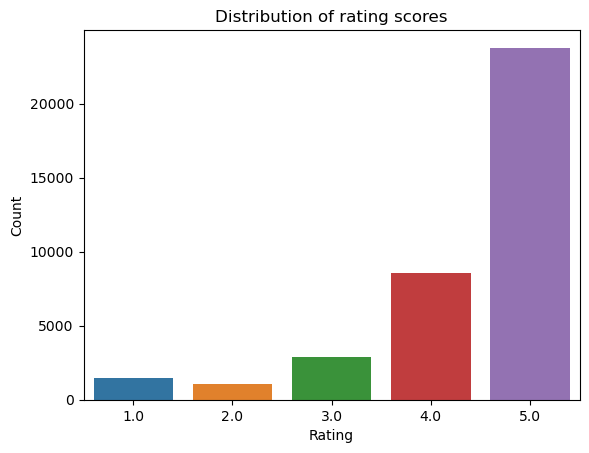

In [23]:
# plotting the reviews rating
sns.countplot(data = data, x = data['reviews.rating'])
plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [24]:
# assigning values to the reviews
sentiment_score = {1: 0, 2: 0, 3: 0, 4: 1, 5: 1}
sentiment = {0: 'NEGATIVE', 1: 'POSITIVE'}

In [25]:
# mapping the assigned values to the dataset and creating new column
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

In [26]:
data['review_len'] = data['reviews.text'].apply(lambda x: len(x.split(' ')))

In [27]:
data

reviews.rating                                       reviews.text  \
0                 5.0  This product so far has not disappointed. My c...   
1                 5.0  great for beginner or experienced person. Boug...   
2                 5.0  Inexpensive tablet for him to use and learn on...   
3                 4.0  I've had my Fire HD 8 two weeks now and I love...   
4                 5.0  I bought this for my grand daughter when she c...   
...               ...                                                ...   
37722             2.0  The battery is having more and more trouble ho...   
37723             3.0  My daughter has had this tablet for almost 2 m...   
37724             1.0  Very cheap and was not impressed at all never ...   
37725             2.0  Hard to use, Lots of ads, and Randomly closes ...   
37726             3.0  I wish it has some more of the apps from the p...   

       sentiment_score sentiment  review_len  
0                    1  POSITIVE          27  
1                    1  POSITIVE          14  
2                    1  POSITIVE          26  
3                    1  POSITIVE         117  
4                    1  POSITIVE         117  
...                ...       ...         ...  
37722                0  NEGATIVE          40  
37723                0  NEGATIVE          14  
37724                0  NEGATIVE          10  
37725                0  NEGATIVE          10  
37726                0  NEGATIVE          18  

[37727 rows x 5 columns]

In [28]:
data['review_len'].describe()

count    37727.000000
mean        30.754287
std         34.545715
min          1.000000
25%         13.000000
50%         21.000000
75%         36.000000
max       1858.000000
Name: review_len, dtype: float64

In [29]:
# value counts of the sentiment_score
data['sentiment_score'].value_counts()

1    32315
0     5412
Name: sentiment_score, dtype: int64

In [30]:
positive_sent = data[data['sentiment_score'] == 1]['review_len'].value_counts().sort_index()
negative_sent = data[data['sentiment_score'] == 0]['review_len'].value_counts().sort_index()

In [31]:
negative_sent.sort_values()

423      1
228      1
226      1
224      1
220      1
      ... 
17     162
14     175
11     186
12     191
10     195
Name: review_len, Length: 225, dtype: int64

In [32]:
positive_sent.sort_values()

1858       1
245        1
246        1
249        1
250        1
        ... 
10      1455
14      1477
13      1670
12      1725
11      1806
Name: review_len, Length: 307, dtype: int64

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = positive_sent.index, y = positive_sent.values, name = 'positive', fill = 'tozeroy',
                         marker_color = 'blue'))
fig.add_trace(go.Scatter(x = negative_sent.index, y = negative_sent.values, name = 'negative', fill = 'tozeroy',
                         marker_color = 'gray'))
fig.update_layout(title = 'Length of postive and negative review text')
fig.update_xaxes(range = (0, 250))
fig.show()

## Text Preprocessing

#### Clean Text

In [34]:
# Function that clean the dataset
def clean_text(text:str):
    text = str(text)
    text = text.lower()
    text = text.strip()
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    return text

#### Remove Stopwords

In [35]:
def remove_stopwords(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Get a list of English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the tokenized words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)

    return filtered_text

#### Stemming

In [36]:
# function that performs stemming
def stemm_text(text:str):
    text = str(text)
    # Initialize the stemmer
    snow = SnowballStemmer('english')

    stemmed_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        # Stem the word/token
        stemmed_sentence.append(snow.stem(w))
    text = " ".join(stemmed_sentence)

    return text

#### Lemmatization

In [37]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [38]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [39]:
# function that lemmatize
def lemmatize(text:str):
    text = str(text)

    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)

    return lemmatized_text

In [40]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#### Applying text processing function

In [41]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

# clean text
data['text'] = data['reviews.text'].apply(clean_text)
# remove stopwords
data['text'] = data['text'].apply(remove_stopwords)
# lemmatize
data['text'] = data['text'].apply(lemmatize)

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [42]:
i = random.choice(range(len(data)))

print(f"Original review: \n{data['reviews.text'].iloc[i]}\n")
print(f"Processed review: \n{data['text'].iloc[i]}")

Original review: 
I love the Fire. I can carry it in my purse plus I can read it anywhere. I took it on my cruise and every chance I had, I laid out on the deck and read books on it. It was a great buy!!

Processed review: 
love fire carry purse plus read anywhere take cruise every chance lay deck read book great buy


In [43]:
data.head()

reviews.rating                                       reviews.text  \
0             5.0  This product so far has not disappointed. My c...   
1             5.0  great for beginner or experienced person. Boug...   
2             5.0  Inexpensive tablet for him to use and learn on...   
3             4.0  I've had my Fire HD 8 two weeks now and I love...   
4             5.0  I bought this for my grand daughter when she c...   

   sentiment_score sentiment  review_len  \
0                1  POSITIVE          27   
1                1  POSITIVE          14   
2                1  POSITIVE          26   
3                1  POSITIVE         117   
4                1  POSITIVE         117   

                                                text  
0  product far disappointed child love use like a...  
1     great beginner experience person buy gift love  
2  inexpensive tablet use learn step nabi thrill ...  
3  fire hd two week love tablet great value prime...  
4  buy grand daughter come visit set user enter a...

Sentiment Polarity - Rating Analysis
An attempt to find whether or not any relationship exists between the sentiment polarity of a review and the rating. We do so by observing how to average sentiment of reviews changes with rating

In [44]:
# Define function to extract a string's sentiment
find_sentiment = lambda text: TextBlob(text).sentiment.polarity

# Create new column in dataframe
data["sentiment polarity"] = data["text"].apply(find_sentiment)

Mean Sentiment for Rating 1: 0.018491889002985273
Mean Sentiment for Rating 2: 0.11376428079010964
Mean Sentiment for Rating 3: 0.2040398259556343
Mean Sentiment for Rating 4: 0.3408516285833364
Mean Sentiment for Rating 5: 0.39433246878487077


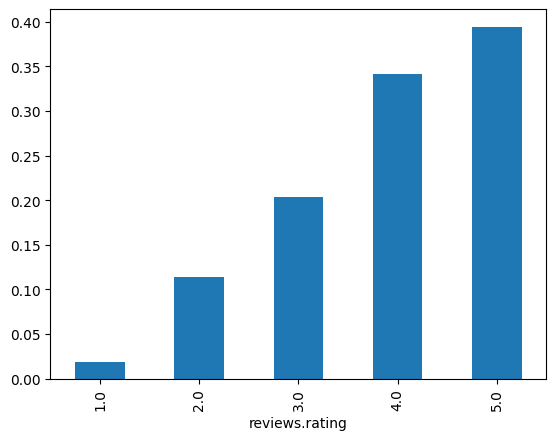

In [45]:
# Plot mean sentiment against rating 
for rating in range(1,6):
    print(f"Mean Sentiment for Rating {rating}: {data[data['reviews.rating'] == rating]['sentiment polarity'].mean()}")

data.groupby("reviews.rating")["sentiment polarity"].mean().plot(kind="bar");

From this, we can see that there is a positive correlation between the mean sentiment of the reviews and the rating it recieved. We can get further insight into this relationship using a scatter plot visualization

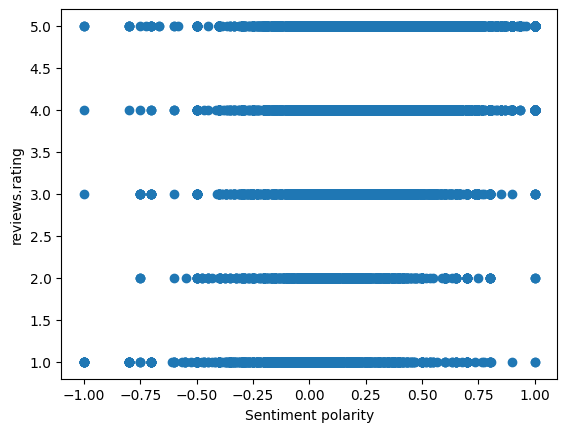

In [46]:
plt.scatter(data["sentiment polarity"], data["reviews.rating"])
plt.xlabel("Sentiment polarity")
plt.ylabel("reviews.rating")
plt.show()

As we can see from the above plot, though we see a positive correlation with the mean sentiment of the reviews, when looking at the data at an individual level, we see that there is a lot of variance and overlap between the sentiment values of reviews of different ratings. We can investigate further by seeing what the most common words that contirbute to this sentiment are.

In [47]:
# Function for finding n most common words in a series
num_most_common = 5
find_n_most_common = lambda text, n: Counter(' '.join(text).split()).most_common(n)

# Create a dictionary to store DataFrames for each rating
result_dfs = {}

# Iterate through ratings and find most common words
for rating in range(1, 6):
    most_common_words = find_n_most_common(data[data["reviews.rating"] == rating]["text"], num_most_common)
    
    # Create a DataFrame for the current rating
    result_df = pd.DataFrame(most_common_words, columns=["Word", "Count"])
    
    # Add a column for sentiment
    result_df["Sentiment"] = result_df["Word"].apply(lambda word: TextBlob(word).sentiment.polarity)
    
    # Sort the DataFrame by sentiment
    result_df = result_df.sort_values(by="Sentiment")
    
    # Store the DataFrame in the dictionary
    result_dfs[rating] = result_df

# Display the DataFrames for each rating
for rating, df in result_dfs.items():
    print(f"Most Common Words for Rating {rating}:")
    print(df[['Word', 'Count']])
    print("\n")

Most Common Words for Rating 1:
      Word  Count
0  battery   1115
1      buy    509
2   amazon    478
3      use    457
4     last    401


Most Common Words for Rating 2:
      Word  Count
0  battery    527
1      use    394
2   tablet    297
3   amazon    293
4      buy    289


Most Common Words for Rating 3:
     Word  Count
0  tablet   1105
2     use    756
3     get    668
4  amazon    576
1    good    842


Most Common Words for Rating 4:
     Word  Count
0  tablet   3142
2     use   2748
4     get   1660
3    good   2154
1   great   2906


Most Common Words for Rating 5:
     Word  Count
2     use   7038
3  tablet   5938
4    easy   5066
1    love   8165
0   great   8643




In [48]:
# Function for finding n nost common words in a series
num_most_common = 25
find_n_most_common = lambda text, n: Counter(' '.join(text).split()).most_common(n)
most_common = data.groupby("reviews.rating")["text"].apply(lambda x: find_n_most_common(x, num_most_common))

for rating in range(1,6):
    idx = rating - 1
    print(f"Most Common Words for Rating {rating} sorted by sentiment: ")   
    # Display the most common words in each rating sorted by sentiment 
    print(list(sorted(most_common.iloc[idx], key=lambda x: TextBlob(x[0]).sentiment.polarity)))
    print("\n")

Most Common Words for Rating 1 sorted by sentiment: 
[('bad', 169), ('battery', 1115), ('buy', 509), ('amazon', 478), ('use', 457), ('last', 401), ('work', 385), ('get', 361), ('one', 299), ('tablet', 264), ('purchase', 241), ('would', 235), ('time', 233), ('product', 218), ('go', 208), ('week', 206), ('charge', 192), ('device', 185), ('return', 184), ('day', 183), ('month', 182), ('like', 168), ('try', 161), ('year', 156), ('good', 158)]


Most Common Words for Rating 2 sorted by sentiment: 
[('long', 157), ('battery', 527), ('use', 394), ('tablet', 297), ('amazon', 293), ('buy', 289), ('get', 284), ('work', 265), ('last', 220), ('time', 205), ('would', 199), ('one', 190), ('purchase', 151), ('like', 144), ('charge', 143), ('go', 135), ('kindle', 121), ('well', 120), ('device', 118), ('return', 115), ('apps', 115), ('take', 114), ('fire', 113), ('product', 107), ('good', 224)]


Most Common Words for Rating 3 sorted by sentiment: 
[('long', 304), ('tablet', 1105), ('use', 756), ('get'

### WordCloud

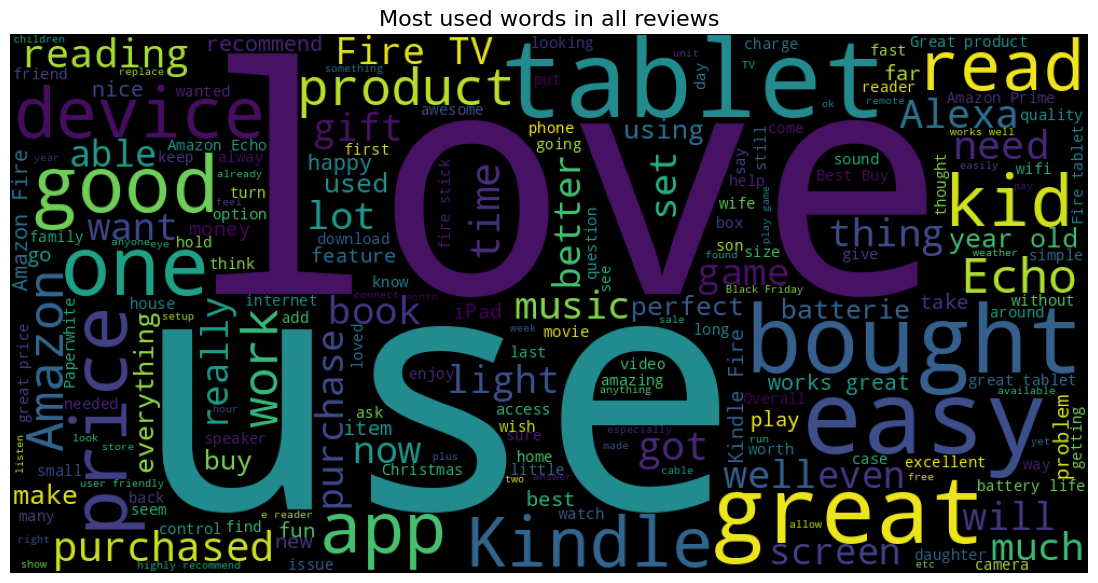

In [49]:
# get all used words
words = pd.Series(' '.join(data['reviews.text']).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(words))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.title("Most used words in all reviews", size=16)
plt.axis("off")
plt.show()

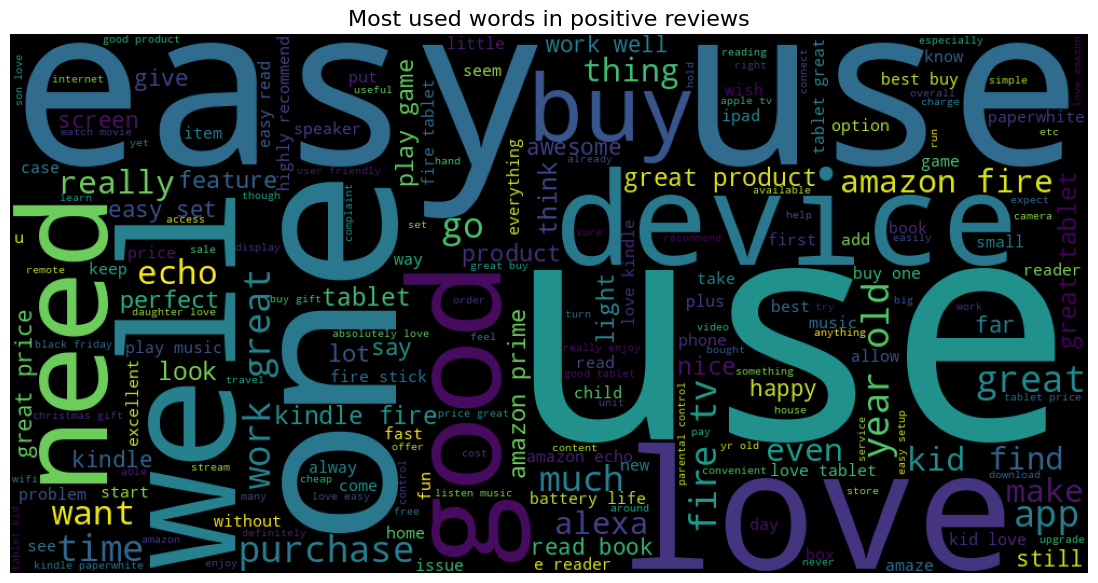

In [50]:
# get words used positive reivews
positive = pd.Series(' '.join(data[data['sentiment_score']==1]['text']).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positive))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=16)
plt.axis("off")
plt.show()

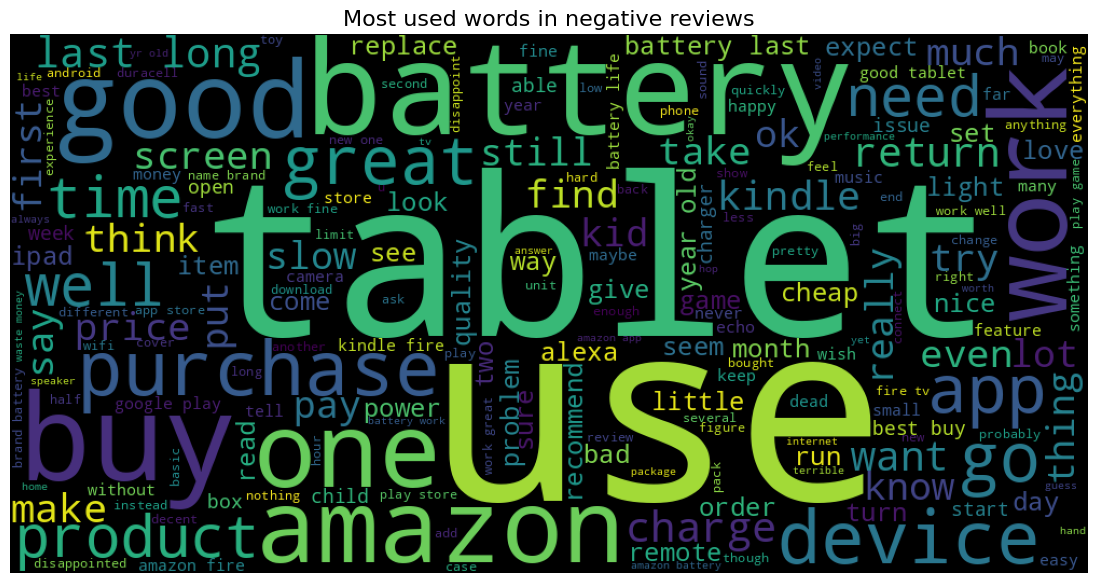

In [51]:
# get words used negative reivews
positive = pd.Series(' '.join(data[data['sentiment_score']==0]['text']).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positive))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)
plt.axis("off")
plt.show()

### Word embedding

In [52]:
texts = data['text']
target = data['sentiment_score']

In [53]:
# calculate the length of our vocabulary
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

In [54]:
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

12115

### Pad Sequences

In [55]:
def embed(corpus):
    return word_tokenizer.texts_to_sequences(corpus)

In [56]:
longest_train = max(texts, key = lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

In [57]:
train_padded_sentences = pad_sequences(embed(texts), length_long_sentence, padding = 'post')
train_padded_sentences

array([[ 17,  98, 479, ...,   0,   0,   0],
       [  1, 423, 283, ...,   0,   0,   0],
       [371,   3,   2, ...,   0,   0,   0],
       ...,
       [144, 936, 186, ...,   0,   0,   0],
       [245,   2,  49, ...,   0,   0,   0],
       [163,  30,  25, ...,   0,   0,   0]], dtype=int32)

### Glove

In [58]:
embeddings_dictionary = dict()
embedding_dim = 100

Link to download the Glove 100D embedding
https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt

In [59]:
# load Glove 100D embeddings
with open('/kaggle/input/glove6b100dtxt/glove.6B.100d.txt', encoding='utf-8') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype = 'float32')
        embeddings_dictionary[word] = vector_dimensions

In [60]:
# load the embedding vectors of the words that appear in the Glove dictionary, others will be initialized as zero
embedding_matrix = np.zeros((vocab_length, embedding_dim))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.013786  ,  0.38216001,  0.53236002, ..., -1.04260004,
         0.28854999,  0.63055998],
       [-0.36531001,  0.31784999, -0.32047001, ..., -0.70363998,
         0.96908998,  0.021153  ],
       ...,
       [-1.20609999,  0.30820999, -0.12575001, ..., -0.52316999,
         0.83841997,  0.46794   ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

## Data Sampling

### Perform oversampling on X_train

In [61]:
# Split the TF-IDF features and sentiment scores into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_padded_sentences, target, test_size=0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(30181, 1056) (30181,) (7546, 1056) (7546,)


In [62]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [63]:
len(X_train_resampled)

51750

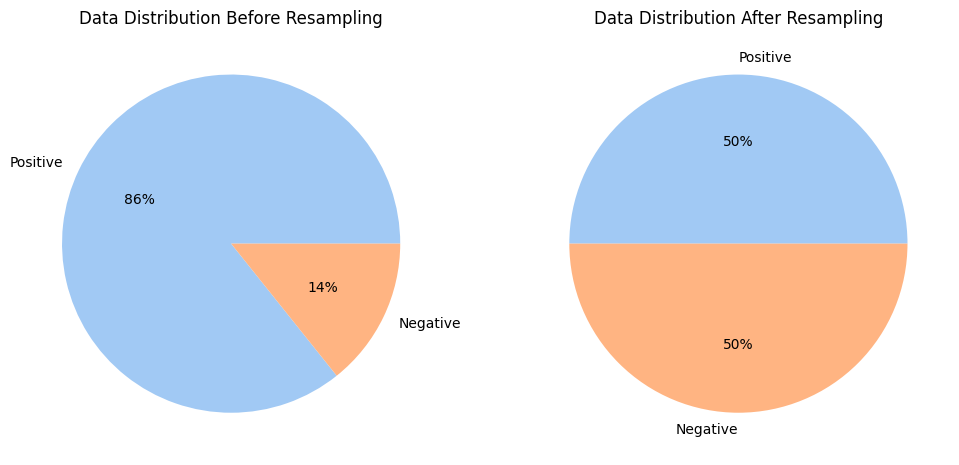

In [64]:
# Data distribution before resampling
target_count_before = pd.Series(y_train).value_counts()

# Data distribution after resampling
target_count_after = pd.Series(y_train_resampled).value_counts()

# Labels for the pie plots
labels = ['Positive', 'Negative']
colors = sns.color_palette('pastel')[0:2]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot before resampling
ax1.pie(target_count_before, labels=labels, colors=colors, autopct='%.0f%%')
ax1.set_title('Data Distribution Before Resampling')

# Plot after resampling
ax2.pie(target_count_after, labels=labels, colors=colors, autopct='%.0f%%')
ax2.set_title('Data Distribution After Resampling')

plt.show()

## Model Development

### LSTM

In [65]:
def glove_lstm():
    model = Sequential()
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0],
        output_dim=embedding_matrix.shape[1],
        weights=[embedding_matrix],
        input_length=length_long_sentence))

    # Reduce the number of LSTM units
    model.add(Bidirectional(LSTM(
        32,  # Reduced number of LSTM units
        return_sequences=True,  # Set to True if you need sequences
        recurrent_dropout=0.2))
    )

    model.add(GlobalMaxPool1D())  # Use GlobalMaxPooling1D if return_sequences=True

    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Define the number of units in your Dense layers based on your task
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=32, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [66]:
model = glove_lstm()
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 embedding (Embedding)       (None, 1056, 100)         1211500   

                                                                 

 bidirectional (Bidirectiona  (None, 1056, 64)         34048     

 l)                                                              

                                                                 

 global_max_pooling1d (Globa  (None, 64)               0         

 lMaxPooling1D)                                                  

                                                                 

 batch_normalization (BatchN  (None, 64)               256       

 ormalization)                                                   

                                                                 

 dropout (Dropout)           (None, 64)                0         

                                        

In [67]:
# Call back creation
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [68]:
history = model.fit(X_train_resampled, y_train_resampled, epochs = 10, batch_size = 1024, validation_data = (X_test, y_test), verbose = 1,
                    callbacks = callbacks)

Epoch 1/10

51/51 [==============================] - 360s 7s/step - loss: 0.6183 - accuracy: 0.6650 - val_loss: 0.6397 - val_accuracy: 0.8094 - lr: 0.0010

Epoch 2/10

51/51 [==============================] - 350s 7s/step - loss: 0.4753 - accuracy: 0.7824 - val_loss: 0.5653 - val_accuracy: 0.8578 - lr: 0.0010

Epoch 3/10

51/51 [==============================] - 351s 7s/step - loss: 0.4176 - accuracy: 0.8186 - val_loss: 0.5436 - val_accuracy: 0.8041 - lr: 0.0010

Epoch 4/10

51/51 [==============================] - 350s 7s/step - loss: 0.3828 - accuracy: 0.8357 - val_loss: 0.5153 - val_accuracy: 0.7978 - lr: 0.0010

Epoch 5/10

51/51 [==============================] - 347s 7s/step - loss: 0.3591 - accuracy: 0.8491 - val_loss: 0.4014 - val_accuracy: 0.8693 - lr: 0.0010

Epoch 6/10

51/51 [==============================] - 348s 7s/step - loss: 0.3356 - accuracy: 0.8620 - val_loss: 0.3589 - val_accuracy: 0.8622 - lr: 0.0010

Epoch 7/10

51/51 [==============================] - 347s 7s/ste

In [69]:
# Model evaluation
score = model.evaluate(X_test, y_test, batch_size=1024)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

8/8 [==============================] - 4s 518ms/step - loss: 0.2706 - accuracy: 0.8794



ACCURACY: 0.8794063329696655

LOSS: 0.270553320646286


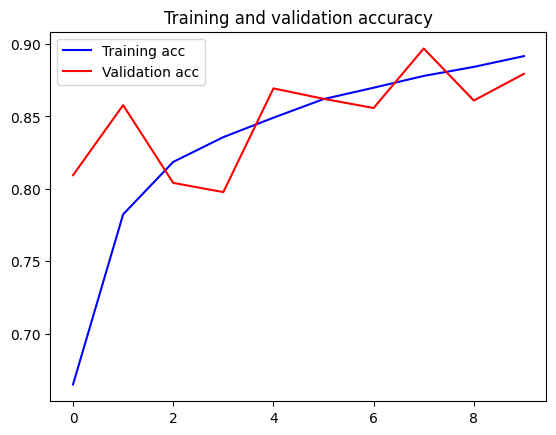

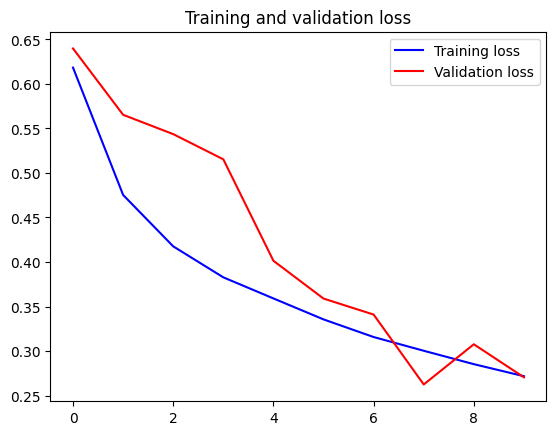

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [71]:
# Predict using your LSTM model
y_pred_lstm = model.predict(X_test)
y_pred_lstm = np.round(y_pred_lstm)

236/236 [==============================] - 119s 500ms/step


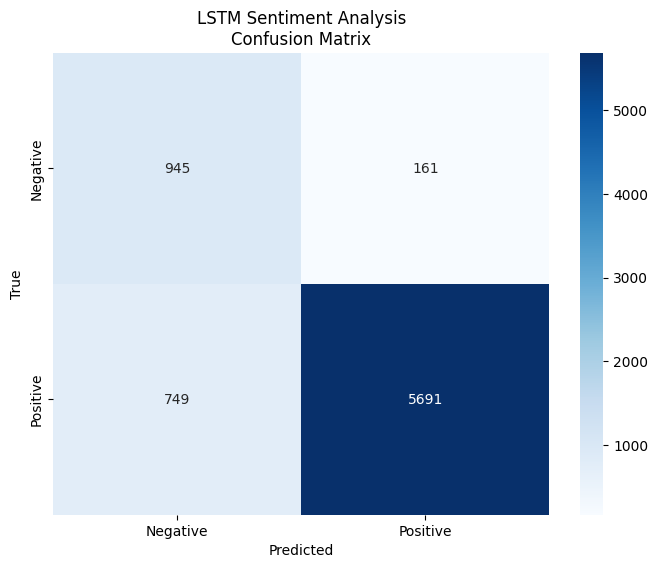

In [72]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lstm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LSTM Sentiment Analysis\nConfusion Matrix')
plt.show()

In [73]:
# Generate the classification report
report = classification_report(y_test, y_pred_lstm, target_names=['Negative', 'Positive'])
print('\nClassification Report for LSTM:\n\n', report)



Classification Report for LSTM:



               precision    recall  f1-score   support



    Negative       0.56      0.85      0.67      1106

    Positive       0.97      0.88      0.93      6440



    accuracy                           0.88      7546

   macro avg       0.77      0.87      0.80      7546

weighted avg       0.91      0.88      0.89      7546




## Model Tuning

In [74]:
def tuned_glove_lstm():
    model = Sequential()
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0],
        output_dim=embedding_matrix.shape[1],
        weights=[embedding_matrix],
        input_length=length_long_sentence))

    model.add(Bidirectional(LSTM(
        64,  # Increased number of LSTM units
        return_sequences=True,
        recurrent_dropout=0.2)
    ))

    model.add(GlobalMaxPool1D())

    model.add(BatchNormalization())
    model.add(Dropout(0.4))  # Adjusted dropout rate

    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=32, activation='relu'))

    model.add(Dropout(0.4))  # Adjusted dropout rate
    model.add(Dense(1, activation='sigmoid'))

    # Use the Adam optimizer with a custom learning rate
    optimizer = Adam(learning_rate=0.001)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [75]:
# Create the tuned model
tuned_model = tuned_glove_lstm()
tuned_model.summary()

Model: "sequential_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 embedding_1 (Embedding)     (None, 1056, 100)         1211500   

                                                                 

 bidirectional_1 (Bidirectio  (None, 1056, 128)        84480     

 nal)                                                            

                                                                 

 global_max_pooling1d_1 (Glo  (None, 128)              0         

 balMaxPooling1D)                                                

                                                                 

 batch_normalization_1 (Batc  (None, 128)              512       

 hNormalization)                                                 

                                                                 

 dropout_2 (Dropout)         (None, 128)               0         

                                      

In [76]:
# Training callbacks (you can use the same callbacks as before)
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0), EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [77]:
# Train the tuned model
history = tuned_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=1024, validation_data=(X_test, y_test), verbose=1, callbacks=callbacks)

Epoch 1/10

51/51 [==============================] - 355s 7s/step - loss: 0.5474 - accuracy: 0.7162 - val_loss: 0.5769 - val_accuracy: 0.8723 - lr: 0.0010

Epoch 2/10

51/51 [==============================] - 350s 7s/step - loss: 0.3953 - accuracy: 0.8273 - val_loss: 0.5095 - val_accuracy: 0.9054 - lr: 0.0010

Epoch 3/10

51/51 [==============================] - 349s 7s/step - loss: 0.3243 - accuracy: 0.8664 - val_loss: 0.4396 - val_accuracy: 0.9100 - lr: 0.0010

Epoch 4/10

51/51 [==============================] - 349s 7s/step - loss: 0.2732 - accuracy: 0.8902 - val_loss: 0.3912 - val_accuracy: 0.8900 - lr: 0.0010

Epoch 5/10

51/51 [==============================] - 351s 7s/step - loss: 0.2336 - accuracy: 0.9082 - val_loss: 0.2996 - val_accuracy: 0.9158 - lr: 0.0010

Epoch 6/10

51/51 [==============================] - 350s 7s/step - loss: 0.1983 - accuracy: 0.9227 - val_loss: 0.3307 - val_accuracy: 0.8742 - lr: 0.0010

Epoch 7/10

51/51 [==============================] - 352s 7s/ste

In [78]:
# Model evaluation
score = tuned_model.evaluate(X_test, y_test, batch_size=1024)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

8/8 [==============================] - 4s 523ms/step - loss: 0.2858 - accuracy: 0.8976



ACCURACY: 0.8975616097450256

LOSS: 0.28579598665237427


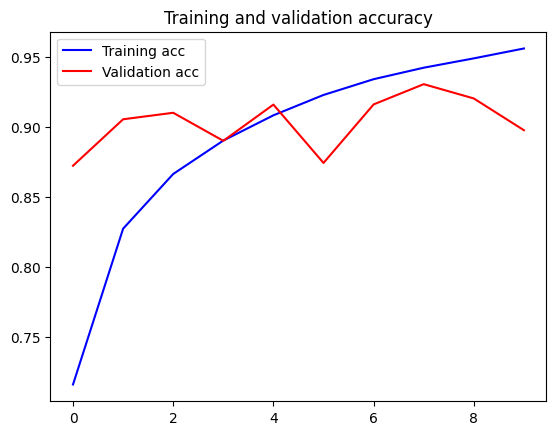

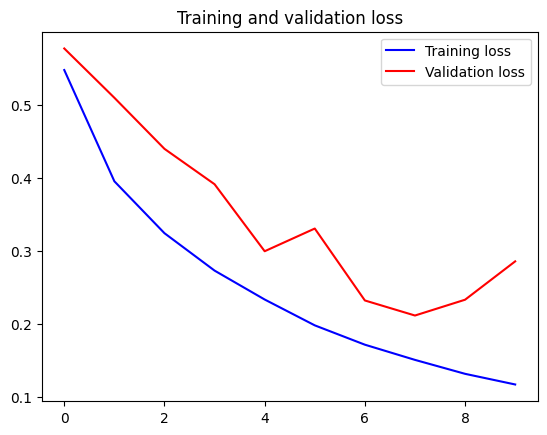

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [81]:
# Predict using your LSTM model
y_pred_tuned_lstm = tuned_model.predict(X_test)
y_pred_tuned_lstm = np.round(y_pred_tuned_lstm)

236/236 [==============================] - 121s 514ms/step


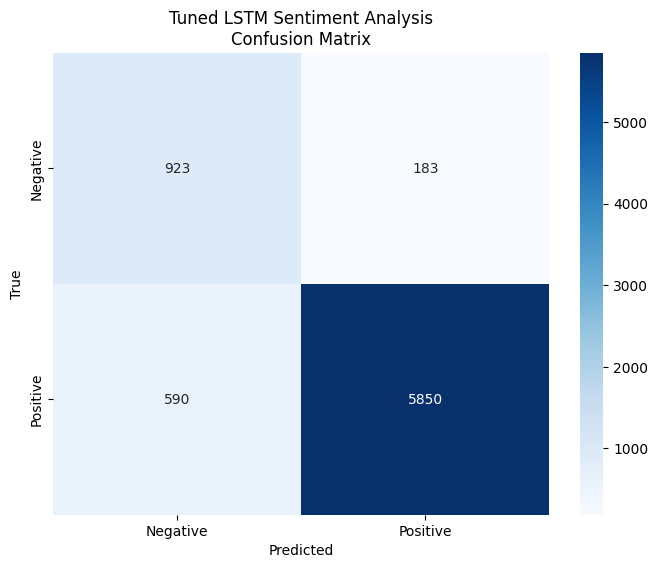

In [82]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned_lstm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Tuned LSTM Sentiment Analysis\nConfusion Matrix')
plt.show()

In [83]:
# Generate the classification report
report = classification_report(y_test, y_pred_tuned_lstm, target_names=['Negative', 'Positive'])
print('\nClassification Report for Tuned LSTM:\n\n', report)



Classification Report for Tuned LSTM:



               precision    recall  f1-score   support



    Negative       0.61      0.83      0.70      1106

    Positive       0.97      0.91      0.94      6440



    accuracy                           0.90      7546

   macro avg       0.79      0.87      0.82      7546

weighted avg       0.92      0.90      0.90      7546




## BERT

In [84]:
#data processing
import re, string
import emoji
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import os

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizer
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel
from transformers import BertTokenizer, TFBertForSequenceClassification

#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
bert_data = data[['text', 'sentiment_score']]
bert_data.head()

text  sentiment_score
0  product far disappointed child love use like a...                1
1     great beginner experience person buy gift love                1
2  inexpensive tablet use learn step nabi thrill ...                1
3  fire hd two week love tablet great value prime...                1
4  buy grand daughter come visit set user enter a...                1

In [86]:
# Load the BERT tokenizer and model
# Directory where you want to save the tokenizer
# output_dir = './Tokenizer/'

# # Create the directory if it doesn't exist
# os.makedirs(output_dir, exist_ok=True)

# Load the BERT tokenizer and save it to the specified directory
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# tokenizer.save_pretrained(output_dir)

In [87]:
# Load the BERT tokenizer and model
# Directory where you want to save the tokenizer
# output_dir = './bert_pre/'

# Create the directory if it doesn't exist
# os.makedirs(output_dir, exist_ok=True)

# Load the BERT tokenizer and save it to the specified directory
bert = TFBertModel.from_pretrained("bert-base-uncased")
# bert.save_pretrained(output_dir)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']

- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).

- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).

All the weights of TFBertModel were initialized from the PyTorch model.

If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictio

In [88]:
token_lens = []

for txt in bert_data['text'].values:
    tokens = tokenizer.encode(txt, max_length=2000, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

In [89]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 1276


In [90]:
max_sequence_length = 128  # Set the maximum sequence length you want to keep

# Filter rows with text lengths less than or equal to the maximum sequence length
bert_data = bert_data[bert_data['text'].apply(lambda x: len(tokenizer.encode(x, max_length=2000, truncation=True)) <= max_sequence_length)]

In [91]:
#Let's check the long tokenized sentences (with more than 80 tokens ):

token_lens = []

for i,txt in enumerate(bert_data['text'].values):
    tokens = tokenizer.encode(txt, max_length=128, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>125:
        print(f"INDEX: {i}, TEXT: {txt}") 

INDEX: 5856, TEXT: brought bargain tablet year ago end disappointed browse speed basically want tablet quick web search without boot pc nervous try glad amazon fire 50 tablet awesome quick surfing task also use kindle e reader app work well reason star rating instead two fold relate apps first issue yahoo email app reason access contact realize first reading email try send email awful take half hour dig inbox email people want send could find address put box new message create pain issue app world dominate iphone android may severely limited find tablet fit neatly one two category however minor annoyance primary reason want tablet need quick internet search research want use ereader beat price quality receive love love love new amazon fire tablet

INDEX: 14349, TEXT: solid well make tablet feel good hand image crisp clean work well hulu acct hbogo acct prime video acct first secs video blurry clear play fine add sd card tablet automatically place apps video sd card app allow great valu

In [92]:
bert_data['token_lens'] = token_lens
bert_data = bert_data.sort_values(by='token_lens', ascending=False)
bert_data.head(20)

text  sentiment_score  \
14392  solid well make tablet feel good hand image cr...                1   
5876   brought bargain tablet year ago end disappoint...                1   
23444  bought fill life music first two week fantasti...                0   
21061  amazon voyage really fantastic ereader prior o...                1   
36380  reason product describe w amp kindle line main...                0   
32528  buy go toshiba k tv build chromecast bought be...                0   
25853  purchase alexia month ago wait write review or...                1   
20952  text sharp paper like well lit condition use b...                1   
5014   bought tablet gift mother law tech savvy alrea...                1   
26069  second alexa refuse call echo little toy wake ...                1   
33310  navigation need work pointer feature suck defi...                0   
29276  full disclosure five amazon echo include dot w...                1   
20940  first good news screen nice brightness word cr...                1   
20907  great reading book print easily readable coupl...                1   
16893  third kindle fire household first kid edition ...                1   
26976  echo small problem blue tooth receiver blue to...                1   
5861   view come ipad user purchase purpose young gra...                0   
28059  echo nice speaker add bonus able respond quest...                0   
4789   bought black friday please fifty dollar tablet...                1   
26041  actually start amazon echo dot see whole thing...                1   

       token_lens  
14392         128  
5876          128  
23444         128  
21061         128  
36380         126  
32528         126  
25853         126  
20952         125  
5014          125  
26069         125  
33310         125  
29276         124  
20940         124  
20907         124  
16893         124  
26976         123  
5861          123  
28059         123  
4789          123  
26041         123

In [93]:
bert_data = bert_data.sample(frac=1).reset_index(drop=True)

In [94]:
bert_data.head()

text  sentiment_score  \
0  highly recommend kindles anything else love re...                1   
1  give start decent tablet screen mess try use i...                0   
2  great tablet third amazon fire purchase purcha...                1   
3  hop fire hd would faster old hd fire much gues...                0   
4  buy grandma absolutely love easy figure thing ...                1   

   token_lens  
0          21  
1          13  
2          36  
3          36  
4          20

In [95]:
X_train, X_test, y_train, y_test = train_test_split(bert_data['text'], bert_data['sentiment_score'], test_size = 0.2, random_state = 42)

In [96]:
# Create a DataFrame from X_train and y_train
test_df = pd.DataFrame({'text': X_test, 'sentiment_score': y_test})

In [97]:
# Create a DataFrame from X_train and y_train
train_df = pd.DataFrame({'text': X_train, 'sentiment_score': y_train})

In [98]:
# Class Balancing by RandomOverSampler
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(train_df['text']).reshape(-1, 1), np.array(train_df['sentiment_score']).reshape(-1, 1));
train_df = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text', 'sentiment_score']);

In [99]:
train_df['sentiment_score'].value_counts()

sentiment_score
1    25709
0    25709
Name: count, dtype: int64

In [100]:
X = train_df['text'].values
y = train_df['sentiment_score'].values

In [101]:
#A validation set will be extracted from the training set to monitor the validation accuracy, and so prevent overfitting.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [102]:
X_test = test_df['text'].values
y_test = test_df['sentiment_score'].values

One hot encoding
After performing some tests, by using one hot encoding on the target variable we achieved higher accuracy. For this reason we will choose one hot enconding over label encoding.
EDIT: We will save a copy of the label encoded target columns since they could be useful for further analysis.

In [103]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [104]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [105]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 46276

VALIDATION DATA: 5142

TESTING DATA: 7516


In [106]:
MAX_LEN = 128

In [107]:
def tokenize(data, max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [108]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

## BERT Model

In [109]:
# Load the BERT tokenizer and model
# Directory where you want to save the tokenizer
# output_dir = './bert_pre/'

# # Create the directory if it doesn't exist
# os.makedirs(output_dir, exist_ok=True)

# Load the BERT tokenizer and save it to the specified directory
bert = TFBertModel.from_pretrained("bert-base-uncased")
# bert.save_pretrained(output_dir)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']

- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).

- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).

All the weights of TFBertModel were initialized from the PyTorch model.

If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictio

In [110]:
MAX_LEN = 128  # Define your desired sequence length

# Load a smaller BERT model (DistilBERT in this case)
# tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
# bert_model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

def create_model(bert_model, max_len=MAX_LEN):
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')

    # Adjust input sequence length
    input_ids = input_ids[:, :max_len]
    attention_masks = attention_masks[:, :max_len]

    embeddings = bert_model([input_ids, attention_masks])[1]  # Use [0] to get embeddings
    output = tf.keras.layers.Dense(2, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    return model

In [111]:
model = create_model(bert, MAX_LEN)
model.summary()

Model: "model"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_3 (InputLayer)           [(None, 128)]        0           []                               

                                                                                                  

 input_4 (InputLayer)           [(None, 128)]        0           []                               

                                                                                                  

 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_3[0][0]',                

                                thPoolingAndCrossAt               'input_4[0][0]']                

                                tentions(last_hidde                                               

                                n_state=(None, 128,                                

In [112]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train,
                         validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=32)

Epoch 1/4

1447/1447 [==============================] - 757s 490ms/step - loss: 0.3056 - categorical_accuracy: 0.8722 - val_loss: 0.1471 - val_categorical_accuracy: 0.9502

Epoch 2/4

1447/1447 [==============================] - 699s 483ms/step - loss: 0.1237 - categorical_accuracy: 0.9567 - val_loss: 0.0837 - val_categorical_accuracy: 0.9749

Epoch 3/4

1447/1447 [==============================] - 699s 483ms/step - loss: 0.0562 - categorical_accuracy: 0.9817 - val_loss: 0.0607 - val_categorical_accuracy: 0.9823

Epoch 4/4

1447/1447 [==============================] - 699s 483ms/step - loss: 0.0346 - categorical_accuracy: 0.9880 - val_loss: 0.0550 - val_categorical_accuracy: 0.9833


In [113]:
result_bert = model.predict([test_input_ids,test_attention_masks])

235/235 [==============================] - 41s 163ms/step


In [114]:
# Assuming that 'model' is already defined

# Evaluate the model on the test data
scores = model.evaluate([test_input_ids, test_attention_masks], y_test, batch_size=32)

# Extract accuracy and loss from the scores
accuracy = scores[1]
loss = scores[0]

# Print the results
print()
print("ACCURACY:", accuracy)
print("LOSS:", loss)

235/235 [==============================] - 39s 166ms/step - loss: 0.2808 - categorical_accuracy: 0.9391



ACCURACY: 0.939063310623169

LOSS: 0.28076088428497314


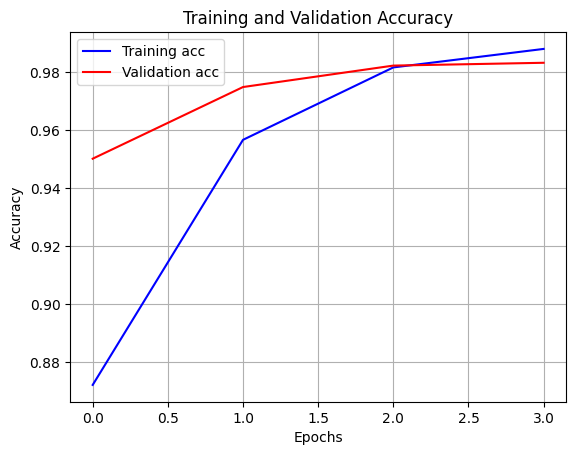

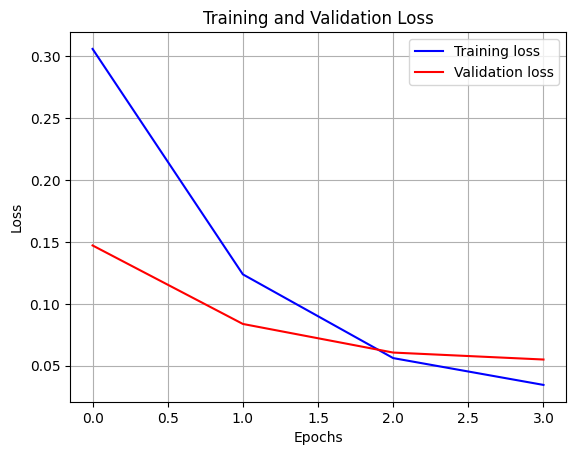

In [117]:
# Assuming that history_bert contains training history
history = history_bert

# Extract training and validation accuracies and losses
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.figure()

# Plot training and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

In [120]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

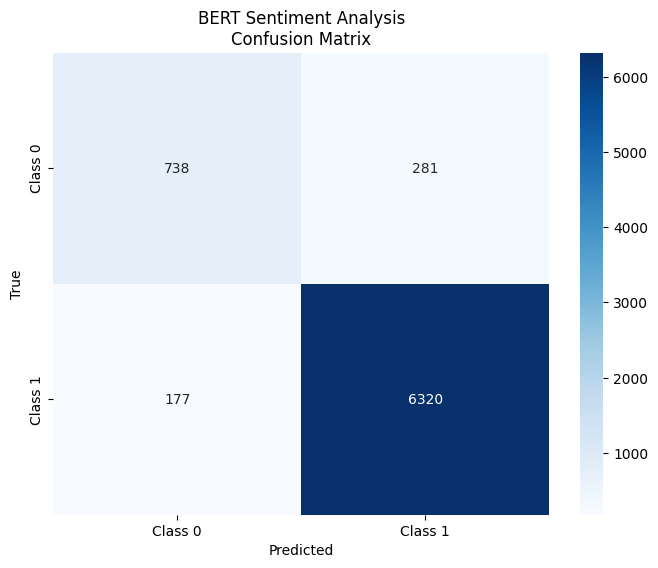

In [121]:
# Assuming that y_test and y_pred_bert are already defined
cm = confusion_matrix(y_test.argmax(1), y_pred_bert.argmax(1))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('BERT Sentiment Analysis\nConfusion Matrix')
plt.show()

In [122]:
# Assuming that y_test and y_pred_bert are already defined
report = classification_report(y_test.argmax(1), y_pred_bert.argmax(1), 
                              target_names=['Negative', 'Positive'])

print('\tClassification Report for BERT:\n\n', report)

	Classification Report for BERT:



               precision    recall  f1-score   support



    Negative       0.81      0.72      0.76      1019

    Positive       0.96      0.97      0.97      6497



    accuracy                           0.94      7516

   macro avg       0.88      0.85      0.86      7516

weighted avg       0.94      0.94      0.94      7516




## Model Comparison

In [123]:
# Create a DataFrame to store the model results
results = pd.DataFrame({
    'Model': ['LSTM', 'Tuned LSTM', 'BERT'],
    'Accuracy': [0.8794, 0.8976, 0.9391],
    'Loss': [0.2706, 0.2858, 0.2808]
})

# Display the results
results

Model  Accuracy    Loss
0        LSTM    0.8794  0.2706
1  Tuned LSTM    0.8976  0.2858
2        BERT    0.9391  0.2808

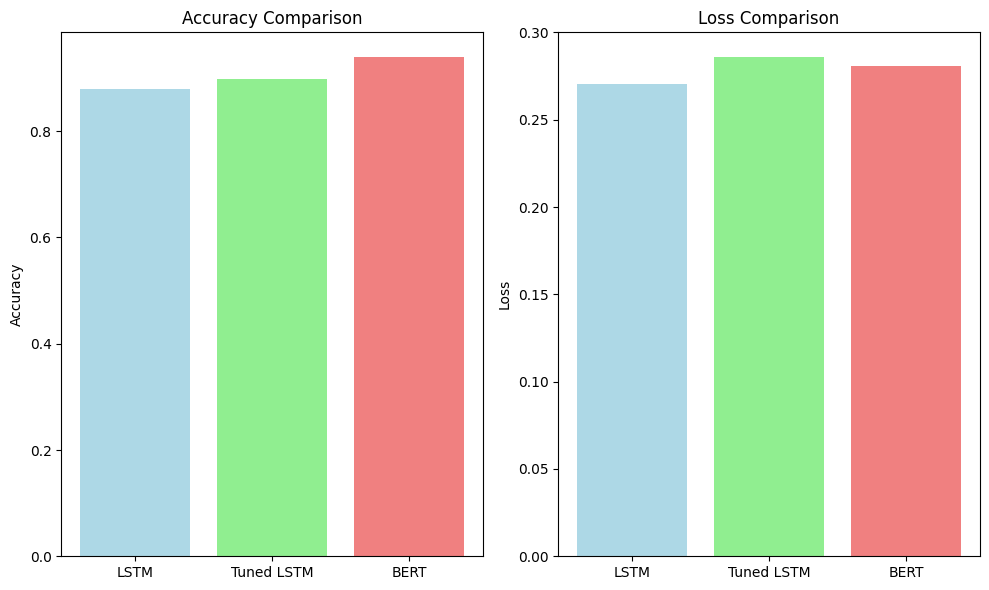

In [135]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create subplots for accuracy and loss
plt.subplot(1, 2, 1)
plt.bar(results['Model'], results['Accuracy'], color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(results['Model'], results['Loss'], color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Loss Comparison')
plt.ylabel('Loss')

# Show the plot
plt.tight_layout()
plt.show()

## Sentiment Prediction

In [126]:
def predict_sentiment(sample_text):
    # Load the BERT tokenizer and model
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")

    # Tokenize and pad the text
    tokens = tokenizer(sample_text, padding=True, truncation=True, return_tensors="tf")
    input_ids = tokens["input_ids"]
    attention_mask = tokens["attention_mask"]

    # Make predictions
    predictions = model.predict([input_ids, attention_mask])

    # Interpret the predictions
    logits = predictions.logits
    predicted_class = tf.argmax(logits, axis=1).numpy()[0]

    # Define your problem-specific interpretation
    if predicted_class == 1:
        sentiment = "Positive"
    else:
        sentiment = "Negative"

    return sentiment

In [128]:
# https://www.amazon.com/product-reviews/B0773ZY26F/ref=acr_dpx_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar
sample_text = """For the price it is definitely worth the purchase, of course I use it just to use the Wi-Fi and don't need
it for gaming (unless you count Solitaire!). Just a few items I can attest to, one it came very well packaged so much I had
to turn the box over to shake it out, but with that fragile item I was glad. Set up is simple and it even came with a 'small'
Phillips screwdriver (surprise) and able to add the two screws to the platform to connect the monitor. My previous (15-year)
monitor was VGA connected, but that cable was hard-wired, and I thought I would have to order one, but then I saw that the
package came with a HDMI cable and thankfully my 5-year-old PC had that type of connection (lucky me). The color is very good
and crisp, but as I said I don't use it for other than internet but will try a movie on it. I registered it on their website,
and it comes with a limited 1-year warranty."""
result = predict_sentiment(sample_text)
print(f"The sample text is {result}.")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.



Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']

You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1/1 [==============================] - 3s 3s/step

The sample text is Positive.


In [129]:
# https://www.amazon.com/product-reviews/B0773ZY26F/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=four_star&reviewerType=all_reviews&pageNumber=1#reviews-filter-bar
sample_text = """I have a two monitor (plus laptop) set up for my home office and I moved a better monitor to my seasonal home.
This is a great basic good size monitor with sound for $90. The sound is a bit tinny, but better than my laptop's sound.
The picture is nice for a 75Hz."""
result = predict_sentiment(sample_text)
print(f"The sample text is {result}.")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.



Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']

You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1/1 [==============================] - 4s 4s/step

The sample text is Positive.


In [130]:
# https://www.amazon.com/product-reviews/B0773ZY26F/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=three_star&reviewerType=all_reviews&pageNumber=1#reviews-filter-bar
sample_text = """So far, the product has met expectations with its excellent picture quality and easy installation.
Despite this issue, it is still a good product overall. However, the built-in speakers are a complete disaster. the quality
of the sound drops by about 75%. Although I primarily use the PC for office work, I occasionally listen to music and watch
videos. However, I have simply chosen to play the music in the phone, as for the videos, I mute the PC and listen to them
from the phone instead. It's really a pity"""
result = predict_sentiment(sample_text)
print(f"The sample text is {result}.")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.



Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']

You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1/1 [==============================] - 3s 3s/step

The sample text is Positive.


In [132]:
# https://www.amazon.com/product-reviews/B0773ZY26F/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=two_star&reviewerType=all_reviews&pageNumber=1#reviews-filter-bar
sample_text = """Update to my original review: I have been using this Sceptre VA monitor for about a month, and I am now no longer satisfied with this display. A faint vertical line has suddenly appeared on the left side of the screen, as well as a faint single horizontal line just below the mid section of the screen. Below the horizontal line the picture resolution has become very poor. Also, I have noticed that the picture sharpness has a slight fading in and out from sharp to less sharp. Therefore, I am no longer giving this monitor my recommendation. Very disappointed. I am now saving up for a quality 4K IPS monitor that I can scale down to simulate a 1080p monitor.
Fantastic colors considering the reasonable purchase price. I was reluctant to buy an inexpensive VA display monitor but this Sceptre 27 inch monitor exceeded my expectations. Good for most gaming and movies as well as for office work as a second display."""
result = predict_sentiment(sample_text)
print(f"The sample text is {result}.")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.



Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']

You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1/1 [==============================] - 3s 3s/step

The sample text is Negative.


In [134]:
# https://www.amazon.com/product-reviews/B0773ZY26F/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&filterByStar=one_star&reviewerType=all_reviews&pageNumber=1#reviews-filter-bar
sample_text = """I recently purchased this Sceptre monitor, and I must say it has been an absolute nightmare.
I expected a reliable display that would last me for years, but unfortunately, it barely made it through a single month of use
before showing serious issues. I am extremely disappointed with the quality and the abysmal customer service I encountered.
After just a few weeks, green lines began appearing on the screen, distorting the visuals and making it impossible to use the
monitor properly. This defect severely impacted my work and entertainment experience. It's astonishing that a product could
fail so quickly. When I contacted Sceptre customer service in the hopes of getting a replacement, I was met with nothing but
frustration. Their lackluster response left me feeling utterly dissatisfied. Instead of acknowledging the faulty unit, they
insisted on repairing it, which would have been a hassle in itself. But the worst part is that they expected me to cover the
shipping and insurance fees for the defective product. This is unacceptable! The manufacturer's refusal to take responsibility
for their faulty product and their insistence on charging the customer for their own mistakes speaks volumes about their poor
customer service. It's evident that they prioritize profits over customer satisfaction. This experience has left a bitter
taste in my mouth, and I strongly advise anyone considering purchasing a monitor to look elsewhere. Save yourself the
frustration, disappointment, and wasted money by exploring other reputable brands that prioritize their customers' needs
and provide reliable products. Don't make the same mistake I did by investing in this subpar monitor from Sceptre. There
are far better options available in the market that offer superior quality, durability, and customer support.
Luckily, Amazon has stellar customer service. They stepped in and helped me get my money back."""
result = predict_sentiment(sample_text)
print(f"The sample text is {result}.")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.



Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']

You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1/1 [==============================] - 3s 3s/step

The sample text is Negative.
